In [33]:
import pandas as pd
import numpy as np

In [34]:
df=pd.read_csv(r"X:\CODING\Statistical Learning Lab\Assignemnt1\food_coded.csv")
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [35]:
print(f"number of observations:{df.shape[0]}")
print(f"number of variables:{df.shape[1]}")

number of observations:125
number of variables:61


In [36]:
print(df.dtypes)

GPA                  object
Gender                int64
breakfast             int64
calories_chicken      int64
calories_day        float64
                     ...   
type_sports          object
veggies_day           int64
vitamins              int64
waffle_calories       int64
weight               object
Length: 61, dtype: object


In [37]:
df.dtypes.value_counts()

int64      27
float64    20
object     14
Name: count, dtype: int64

In [38]:
df.select_dtypes(include="number").isnull().sum()

Gender                           0
breakfast                        0
calories_chicken                 0
calories_day                    19
calories_scone                   1
coffee                           0
comfort_food_reasons_coded      19
cook                             3
comfort_food_reasons_coded.1     0
cuisine                         17
diet_current_coded               0
drink                            2
eating_changes_coded             0
eating_changes_coded1            0
eating_out                       0
employment                       9
ethnic_food                      0
exercise                        13
father_education                 1
fav_cuisine_coded                0
fav_food                         2
fries                            0
fruit_day                        0
grade_level                      0
greek_food                       0
healthy_feeling                  0
ideal_diet_coded                 0
income                           1
indian_food         

In [39]:
df.select_dtypes(include="number").isnull().sum().sum()

99

In [40]:
df.duplicated().sum()

0

In [41]:
df.select_dtypes(include="object").columns

Index(['GPA', 'comfort_food', 'comfort_food_reasons', 'diet_current',
       'eating_changes', 'father_profession', 'fav_cuisine', 'food_childhood',
       'healthy_meal', 'ideal_diet', 'meals_dinner_friend',
       'mother_profession', 'type_sports', 'weight'],
      dtype='object')

In [42]:
for col in df.select_dtypes(include='object').columns:
    temp=pd.to_numeric(df[col],errors='coerce')
    conversion_rate=temp.notna().mean()
    if(conversion_rate>=0.9):
        df[col]=temp
        print(f"converted {col} to numeric with conversion ratio: {conversion_rate}")
    else:
        print(f"failed to convert {col} to numeric with converstion ratio: {conversion_rate}")

converted GPA to numeric with conversion ratio: 0.96
failed to convert comfort_food to numeric with converstion ratio: 0.0
failed to convert comfort_food_reasons to numeric with converstion ratio: 0.0
failed to convert diet_current to numeric with converstion ratio: 0.0
failed to convert eating_changes to numeric with converstion ratio: 0.0
failed to convert father_profession to numeric with converstion ratio: 0.0
failed to convert fav_cuisine to numeric with converstion ratio: 0.0
failed to convert food_childhood to numeric with converstion ratio: 0.0
failed to convert healthy_meal to numeric with converstion ratio: 0.0
failed to convert ideal_diet to numeric with converstion ratio: 0.0
failed to convert meals_dinner_friend to numeric with converstion ratio: 0.0
failed to convert mother_profession to numeric with converstion ratio: 0.0
failed to convert type_sports to numeric with converstion ratio: 0.0
converted weight to numeric with conversion ratio: 0.96


In [43]:
for col in df.select_dtypes(include="number").columns:
    print(f"COLUMN: {col}")
    print(f"mean: {df[col].mean()}")
    print(f"median: {df[col].median()}")
    print(f"Variance: {df[col].var()}")
    print(f"Std: {df[col].std()}")
    print(f"quantiles: {df[col].quantile([0.25,0.50,0.75])}")
    print()

COLUMN: GPA
mean: 3.4155583333333337
median: 3.5
Variance: 0.15220838312324914
Std: 0.39013892797726446
quantiles: 0.25    3.2
0.50    3.5
0.75    3.7
Name: GPA, dtype: float64

COLUMN: Gender
mean: 1.392
median: 1.0
Variance: 0.24025806451612866
Std: 0.4901612637858368
quantiles: 0.25    1.0
0.50    1.0
0.75    2.0
Name: Gender, dtype: float64

COLUMN: breakfast
mean: 1.112
median: 1.0
Variance: 0.1002580645161291
Std: 0.31663553893416496
quantiles: 0.25    1.0
0.50    1.0
0.75    1.0
Name: breakfast, dtype: float64

COLUMN: calories_chicken
mean: 577.32
median: 610.0
Variance: 17217.15483870968
Std: 131.21415639598374
quantiles: 0.25    430.0
0.50    610.0
0.75    720.0
Name: calories_chicken, dtype: float64

COLUMN: calories_day
mean: 3.0283018867924527
median: 3.0
Variance: 0.4087151841868828
Std: 0.6393083639268947
quantiles: 0.25    3.0
0.50    3.0
0.75    3.0
Name: calories_day, dtype: float64

COLUMN: calories_scone
mean: 505.241935483871
median: 420.0
Variance: 53287.339365329

In [44]:
df.describe()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,...,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories,weight
count,120.000000,125.000000,125.000000,125.000000,106.000000,124.000000,125.00000,106.000000,122.000000,125.000000,...,124.000000,124.000000,123.000000,125.000000,124.000000,125.000000,125.000000,125.000000,125.000000,120.000000
mean,3.415558,1.392000,1.112000,577.320000,3.028302,505.241935,1.75200,2.698113,2.786885,2.688000,...,3.120968,1.217742,1.390244,3.336000,947.580645,555.040000,4.008000,1.512000,1073.400000,158.500000
std,0.390139,0.490161,0.316636,131.214156,0.639308,230.840506,0.43359,1.972042,1.038351,1.910987,...,1.115980,0.414385,0.489800,1.436528,202.090179,152.370379,1.081337,0.501867,248.667092,31.758278
min,2.200000,1.000000,1.000000,265.000000,2.000000,315.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,580.000000,345.000000,1.000000,1.000000,575.000000,100.000000
25%,3.200000,1.000000,1.000000,430.000000,3.000000,420.000000,2.00000,2.000000,2.000000,2.000000,...,2.000000,1.000000,1.000000,2.000000,725.000000,500.000000,3.000000,1.000000,900.000000,135.000000
50%,3.500000,1.000000,1.000000,610.000000,3.000000,420.000000,2.00000,2.000000,3.000000,2.000000,...,3.000000,1.000000,1.000000,3.000000,940.000000,500.000000,4.000000,2.000000,900.000000,155.000000
75%,3.700000,2.000000,1.000000,720.000000,3.000000,420.000000,2.00000,3.000000,3.000000,3.000000,...,4.000000,1.000000,2.000000,5.000000,1165.000000,690.000000,5.000000,2.000000,1315.000000,180.000000
max,4.000000,2.000000,2.000000,720.000000,4.000000,980.000000,2.00000,9.000000,5.000000,9.000000,...,6.000000,2.000000,2.000000,5.000000,1165.000000,850.000000,5.000000,2.000000,1315.000000,265.000000


In [45]:
df['calories_day'].unique()

array([nan,  3.,  4.,  2.])

In [46]:
np.all(np.equal(df['calories_day'].dropna()%1,0))

True

In [47]:
df.select_dtypes(include='number').columns

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food_reasons_coded', 'cook',
       'comfort_food_reasons_coded.1', 'cuisine', 'diet_current_coded',
       'drink', 'eating_changes_coded', 'eating_changes_coded1', 'eating_out',
       'employment', 'ethnic_food', 'exercise', 'father_education',
       'fav_cuisine_coded', 'fav_food', 'fries', 'fruit_day', 'grade_level',
       'greek_food', 'healthy_feeling', 'ideal_diet_coded', 'income',
       'indian_food', 'italian_food', 'life_rewarding', 'marital_status',
       'mother_education', 'nutritional_check', 'on_off_campus',
       'parents_cook', 'pay_meal_out', 'persian_food',
       'self_perception_weight', 'soup', 'sports', 'thai_food',
       'tortilla_calories', 'turkey_calories', 'veggies_day', 'vitamins',
       'waffle_calories', 'weight'],
      dtype='object')

In [48]:
for col in df.select_dtypes(include='number').columns:
    if np.all(np.equal(df[col].dropna()%1,0)):
        avg=round(df[col].mean())
        df[col]=df[col].fillna(avg)
    else:
        avg=df[col].mean()
        df[col]=df[col].fillna(avg)

In [49]:
for col in df.columns:
    na=df[col].isna().sum()
    if na>0:
        print(f"{col} has {na} missing")

comfort_food has 1 missing
comfort_food_reasons has 2 missing
diet_current has 1 missing
eating_changes has 3 missing
father_profession has 3 missing
fav_cuisine has 2 missing
food_childhood has 1 missing
healthy_meal has 1 missing
ideal_diet has 1 missing
meals_dinner_friend has 3 missing
mother_profession has 2 missing
type_sports has 26 missing


In [50]:
for col in df.select_dtypes(include='object').columns:
    df[col]=df[col].fillna('missing')

In [51]:
for col in df.columns:
    if "food" in col:
        print(col)

comfort_food
comfort_food_reasons
comfort_food_reasons_coded
comfort_food_reasons_coded.1
ethnic_food
fav_food
food_childhood
greek_food
indian_food
italian_food
persian_food
thai_food


In [52]:
for col in df.columns:
    if "cal" in col:
        print(col)

calories_chicken
calories_day
calories_scone
tortilla_calories
turkey_calories
waffle_calories


In [53]:
df['indian_food'].unique()

array([5, 4, 2, 1, 3], dtype=int64)

In [54]:
df['italian_food'].unique()

array([5, 4, 3], dtype=int64)

In [55]:
df['thai_food'].unique()

array([1, 2, 5, 4, 3], dtype=int64)

In [56]:
df['greek_food'].unique()

array([5, 4, 2, 3, 1], dtype=int64)

In [57]:
df['persian_food'].unique()

array([5., 4., 2., 1., 3.])

In [58]:
for col in df.columns:
    if 'food' in col:
        print(col)
        print(df[col].dtypes)
        print()

comfort_food
object

comfort_food_reasons
object

comfort_food_reasons_coded
float64

comfort_food_reasons_coded.1
int64

ethnic_food
int64

fav_food
float64

food_childhood
object

greek_food
int64

indian_food
int64

italian_food
int64

persian_food
float64

thai_food
int64



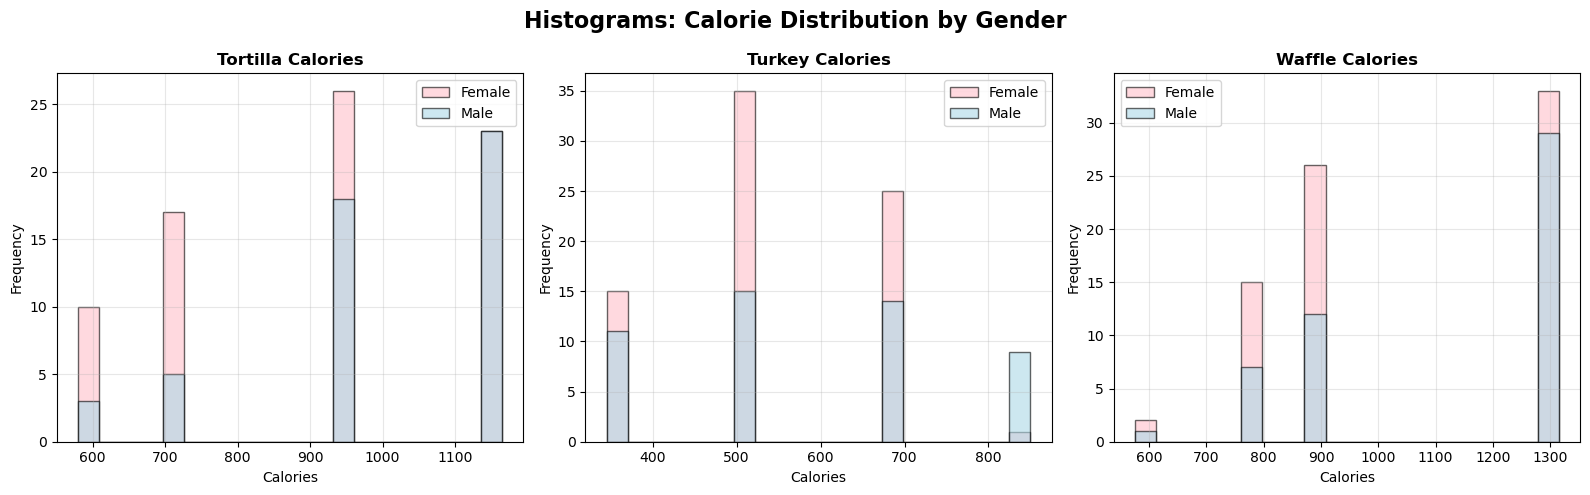

C:\Users\johnf\AppData\Local\Temp\ipykernel_25948\2180836354.py:40: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes2[i].boxplot(data_to_plot, labels=['Female', 'Male'],
C:\Users\johnf\AppData\Local\Temp\ipykernel_25948\2180836354.py:40: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes2[i].boxplot(data_to_plot, labels=['Female', 'Male'],
C:\Users\johnf\AppData\Local\Temp\ipykernel_25948\2180836354.py:40: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes2[i].boxplot(data_to_plot, labels=['Female', 'Male'],


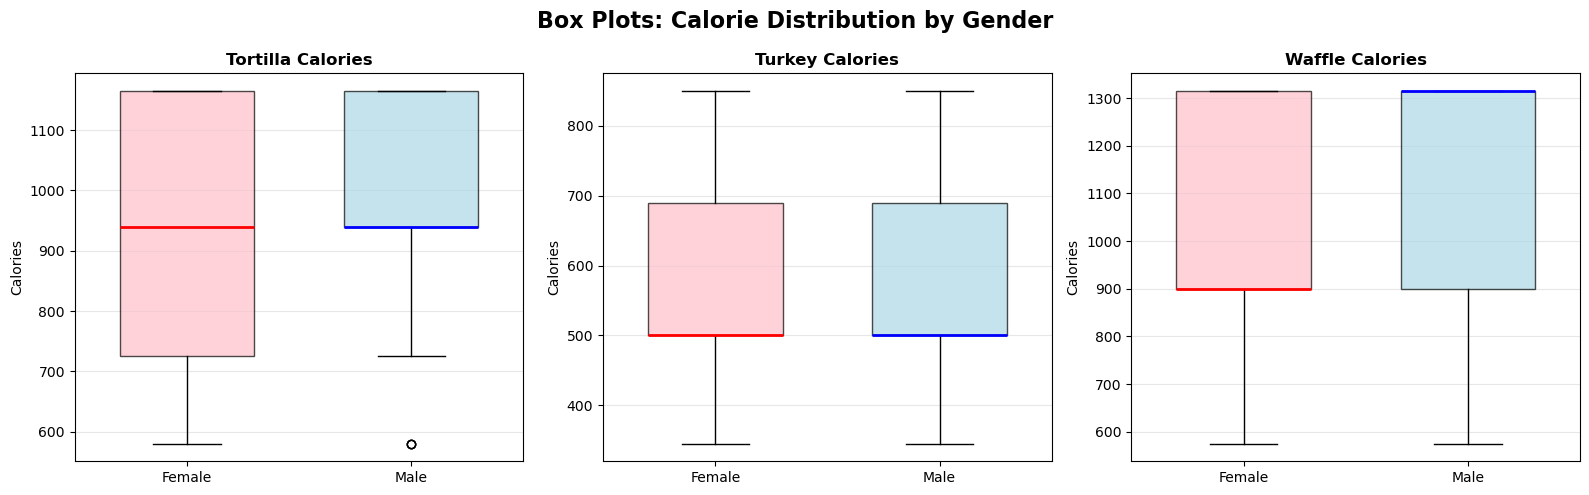

In [ ]:
import matplotlib.pyplot as plt
female_data = df[df['Gender'] == 1]
male_data = df[df['Gender'] == 2]
calorie_columns = ['tortilla_calories', 'turkey_calories', 'waffle_calories']
fig1, axes1 = plt.subplots(1, 3, figsize=(16, 5))
fig1.suptitle('Histograms: Calorie Distribution by Gender', fontsize=16, fontweight='bold')
for i, col in enumerate(calorie_columns):
    axes1[i].hist(female_data[col], bins=20, color='pink', alpha=0.6, 
                  edgecolor='black', label='Female')
    axes1[i].hist(male_data[col], bins=20, color='lightblue', alpha=0.6, 
                  edgecolor='black', label='Male')
    axes1[i].set_title(f'{col.replace("_", " ").title()}', fontsize=12, fontweight='bold')
    axes1[i].set_xlabel('Calories')
    axes1[i].set_ylabel('Frequency')
    axes1[i].legend()
    axes1[i].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
fig2, axes2 = plt.subplots(1, 3, figsize=(16, 5))
fig2.suptitle('Box Plots: Calorie Distribution by Gender', fontsize=16, fontweight='bold')
for i, col in enumerate(calorie_columns):
    data_to_plot = [female_data[col].dropna(), male_data[col].dropna()]
    bp = axes2[i].boxplot(data_to_plot, labels=['Female', 'Male'], 
                          patch_artist=True, widths=0.6)
    bp['boxes'][0].set_facecolor('pink')
    bp['boxes'][0].set_alpha(0.7)
    bp['boxes'][1].set_facecolor('lightblue')
    bp['boxes'][1].set_alpha(0.7)
    bp['medians'][0].set_color('red')
    bp['medians'][0].set_linewidth(2)
    bp['medians'][1].set_color('blue')
    bp['medians'][1].set_linewidth(2)
    axes2[i].set_title(f'{col.replace("_", " ").title()}', fontsize=12, fontweight='bold')
    axes2[i].set_ylabel('Calories')
    axes2[i].grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

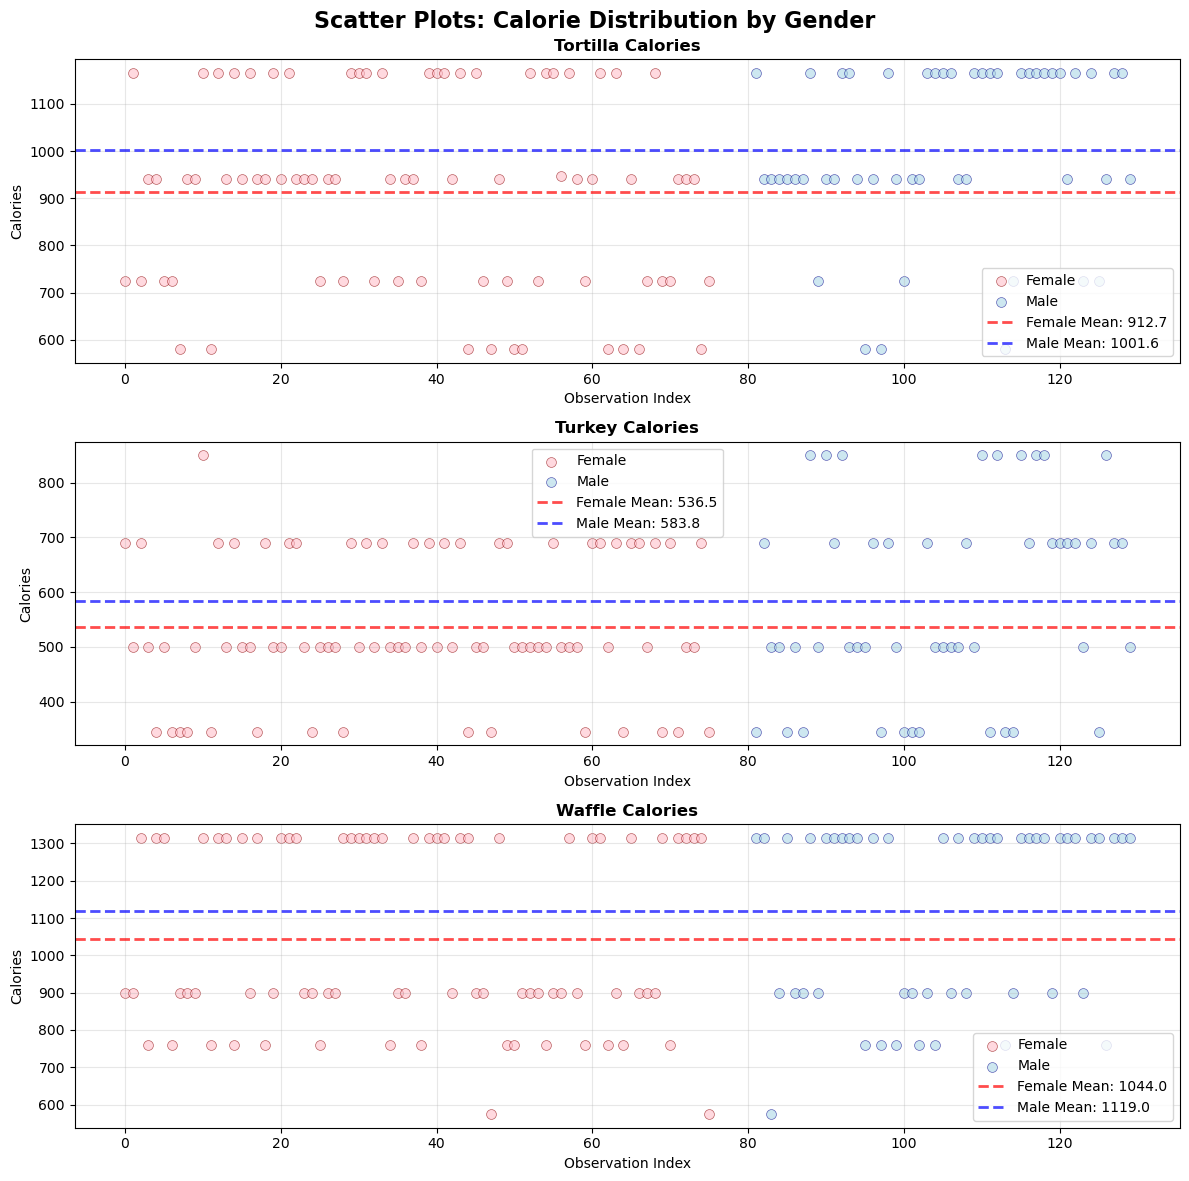


=== Summary Statistics ===


Tortilla Calories:
Female - Mean: 912.74, Median: 940.00, Std: 206.23
Male   - Mean: 1001.63, Median: 940.00, Std: 182.47

Turkey Calories:
Female - Mean: 536.51, Median: 500.00, Std: 130.85
Male   - Mean: 583.78, Median: 500.00, Std: 178.44

Waffle Calories:
Female - Mean: 1044.01, Median: 900.00, Std: 247.99
Male   - Mean: 1118.98, Median: 1315.00, Std: 245.28


In [ ]:
fig3, axes3 = plt.subplots(3, 1, figsize=(12, 12))
fig3.suptitle('Scatter Plots: Calorie Distribution by Gender', fontsize=16, fontweight='bold')
for i, col in enumerate(calorie_columns):
    female_indices = np.arange(len(female_data))
    male_indices = np.arange(len(male_data))
    axes3[i].scatter(female_indices, female_data[col].values, 
                     color='pink', alpha=0.6, s=50, label='Female', edgecolors='darkred', linewidth=0.5)
    axes3[i].scatter(male_indices + len(female_data) + 5, male_data[col].values, 
                     color='lightblue', alpha=0.6, s=50, label='Male', edgecolors='darkblue', linewidth=0.5)
    axes3[i].axhline(y=female_data[col].mean(), color='red', linestyle='--', 
                     linewidth=2, alpha=0.7, label=f'Female Mean: {female_data[col].mean():.1f}')
    axes3[i].axhline(y=male_data[col].mean(), color='blue', linestyle='--', 
                     linewidth=2, alpha=0.7, label=f'Male Mean: {male_data[col].mean():.1f}')
    axes3[i].set_title(f'{col.replace("_", " ").title()}', fontsize=12, fontweight='bold')
    axes3[i].set_xlabel('Observation Index')
    axes3[i].set_ylabel('Calories')
    axes3[i].legend(loc='best')
    axes3[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n=== Summary Statistics ===\n")
for col in calorie_columns:
    print(f"\n{col.replace('_', ' ').title()}:")
    print(f"Female - Mean: {female_data[col].mean():.2f}, Median: {female_data[col].median():.2f}, Std: {female_data[col].std():.2f}")
    print(f"Male   - Mean: {male_data[col].mean():.2f}, Median: {male_data[col].median():.2f}, Std: {male_data[col].std():.2f}")

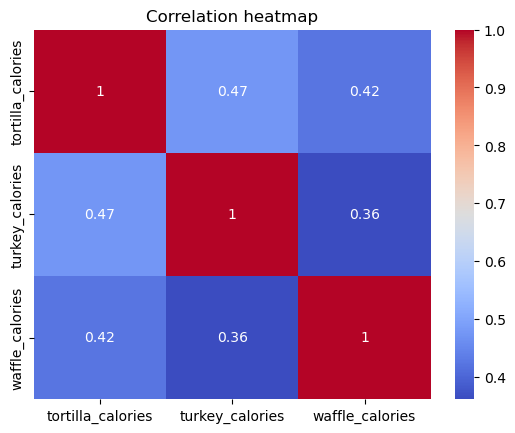

In [64]:
import seaborn as sns
sns.heatmap(df[['tortilla_calories','turkey_calories','waffle_calories']].corr(),annot=True,cmap='coolwarm')
plt.title("Correlation heatmap")
plt.show()

In [65]:
df['breakfast'].unique()

array([1, 2], dtype=int64)

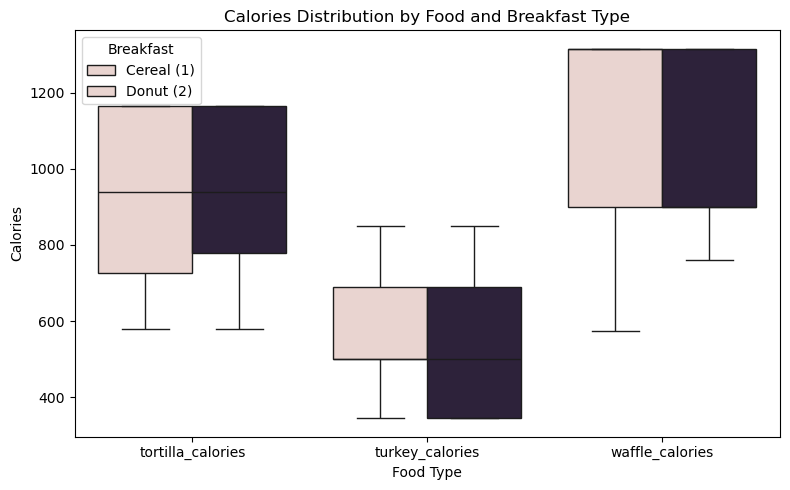

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['tortilla_calories', 'turkey_calories', 'waffle_calories']

long_df = df.melt(
    id_vars='breakfast',
    value_vars=cols,
    var_name='food',
    value_name='calories'
)
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=long_df,
    x='food',
    y='calories',
    hue='breakfast'
)

plt.title("Calories Distribution by Food and Breakfast Type")
plt.xlabel("Food Type")
plt.ylabel("Calories")
plt.legend(title="Breakfast", labels=["Cereal (1)", "Donut (2)"])
plt.tight_layout()
plt.show()


In [68]:
df[['tortilla_calories','turkey_calories','waffle_calories']].corr()

,tortilla_calories,turkey_calories,waffle_calories
tortilla_calories,1.000000,0.474794,0.421391
turkey_calories,0.474794,1.000000,0.361239
waffle_calories,0.421391,0.361239,1.000000


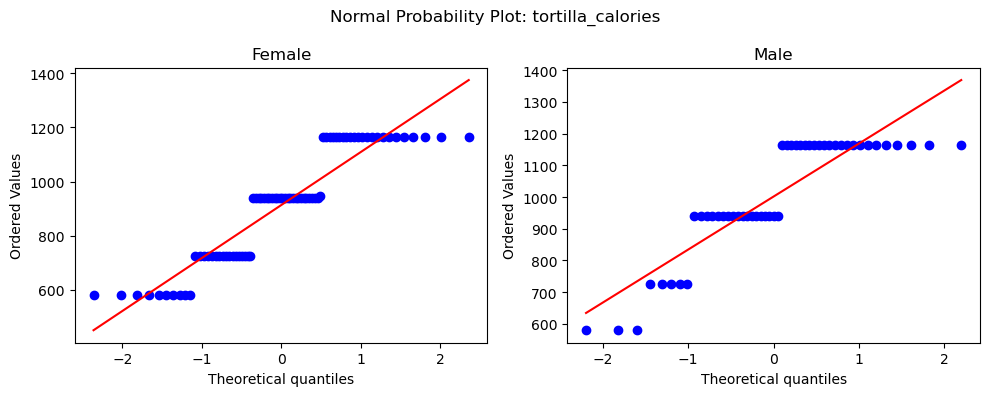

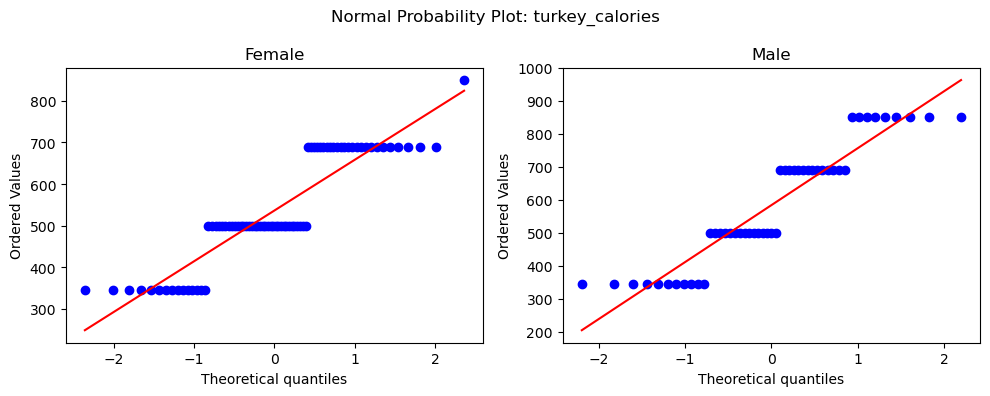

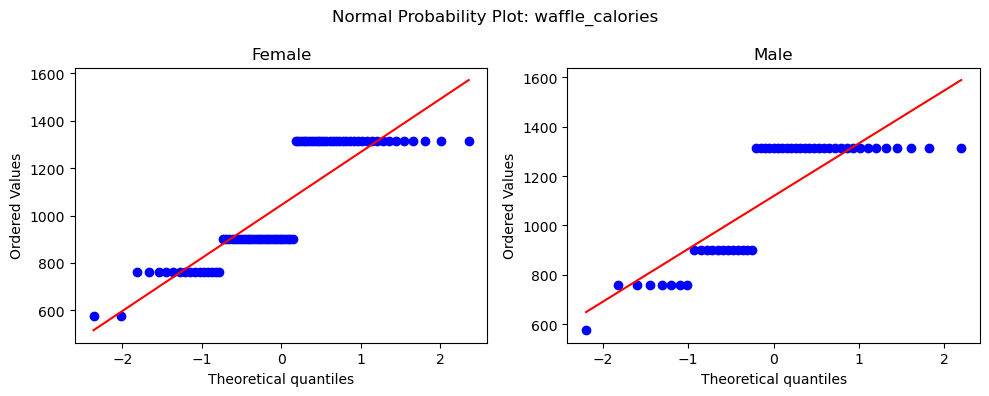

In [70]:
from scipy import stats
import matplotlib.pyplot as plt

cols = [
    'tortilla_calories',
    'turkey_calories',
    'waffle_calories'
]

gender_map = {1: 'Female', 2: 'Male'}

for col in cols:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    for ax, (g, label) in zip(axes, gender_map.items()):
        data = df.loc[df['Gender'] == g, col].dropna()
        stats.probplot(data, dist='norm', plot=ax)
        ax.set_title(label)

    fig.suptitle(f'Normal Probability Plot: {col}')
    plt.tight_layout()
    plt.show()
